NH3 Temperature Regressors Analysis
REGRESSORS: Temepratura TS, Vegetazione TS (High, Low)

In [1]:
import sys
sys.path.append('..')

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from utils import filters, plots, transformations

In [2]:
# Load the NETCDF dataset
nh3_nc = xr.load_dataset('../../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc') # Copernicus (0.1°x0.1°)

In [3]:
# Load the NH3 layer in the region specified by the bounding box
nh3 = nh3_nc.agl

In [4]:
# Load the shapefile
shape = gpd.read_file('../../resources/regione/regione_2015.shp')
shape.head()

,CODICE,NOME,SHAPE_AREA,SHAPE_LEN,geometry
0,03,REGIONE LOMBARDIA,2.386795e+10,1.535219e+06,"MULTIPOLYGON (((460668.530 5015498.348, 460677..."


In [5]:
# Load the NETCDF regressors dataset
ds_temperature = xr.load_dataset('../../datasets/temperature.nc') # Copernicus (0.1°x0.1°)

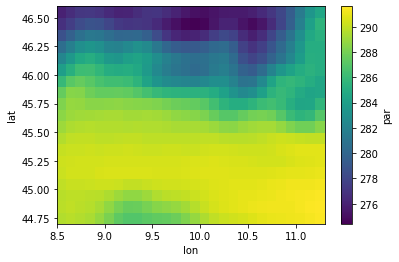

In [6]:
t2m = ds_temperature.t2m
t2m = t2m.transpose("time", "latitude", "longitude")
t2m = t2m.sortby("latitude", ascending=True)  # Riordina
t2m_adjusted = transformations.adjust_var_grid(t2m, nh3.lat, nh3.lon, plot=True)

In [7]:
t2m_adjusted.head(3)

<xarray.DataArray 'par' (time: 3, lat: 3, lon: 3)>
array([[[279.08547974, 279.01321411, 278.8449707 ],
        [279.30627441, 279.22137451, 279.01544189],
        [279.51376343, 279.49047852, 279.34216309]],

       [[285.81945801, 285.75894165, 285.50598145],
        [285.8586731 , 285.87930298, 285.69863892],
        [285.19320679, 285.31335449, 285.25949097]],

       [[288.55407715, 288.53082275, 288.30270386],
        [288.93093872, 288.94824219, 288.75183105],
        [289.15948486, 289.24795532, 289.1244812 ]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15T12:00:00 ... 2000-03-15T12:00:00
  * lat      (lat) float32 44.75 44.85 44.95
  * lon      (lon) float32 8.55 8.65 8.75

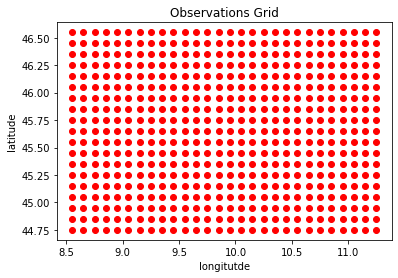

<Figure size 432x288 with 0 Axes>

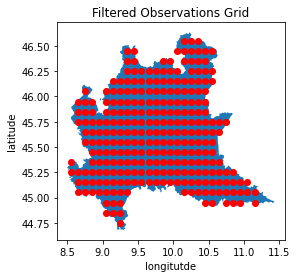

In [8]:
# TODO: Asse orizzontale sbagliato
shape.to_crs(epsg=4326, inplace=True)
data = filters.filter_data_on_shapefile(t2m_adjusted, lats = t2m_adjusted.lat, lons = t2m_adjusted.lon, shp=shape, epsg=4326, plot_grid=True, plot_filter=True)

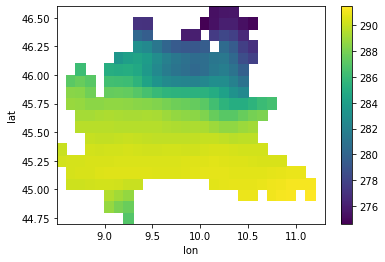

In [9]:
lats = t2m_adjusted.lat.to_series().tolist()
lons = t2m_adjusted.lon.to_series().tolist()
times = t2m_adjusted.time.to_series().tolist()

t2m_filtered = xr.DataArray(data, coords=[times, lats , lons], dims=['time', 'lat', 'lon'])   
t2m_filtered.attrs = t2m_adjusted.attrs
t2m_filtered.mean(dim='time').plot()
plt.show()